In [5]:
import MeCab
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import pymysql
import sqlalchemy
import re
import ast
from gensim.models import Word2Vec

In [6]:
df = pd.read_csv('esg_report_dataset_cleansing.csv')
df['noun']  = df['noun'].map(lambda x : ast.literal_eval(x))
df.head(5)

,title,index,content,noun
0,[서스틴베스트] 2020 기업 ESG 분석보고서,9,평가 개요 당사는 자체 개발한 ESGValue 모형을 활용해 국내 상장기업들의 ES...,"[개요, 자체, 개발, ESGValue, 모형, 활용, 국내, 상장, 기업, ESG..."
1,[서스틴베스트] 2020 기업 ESG 분석보고서,10,혁신활동 친환경 혁신역량 친환경 제품개발을 위한 연구개발을 활발히 진행하고 있으며，...,"[혁신, 활동, 친환경, 혁신, 역량, 친환경, 제품, 개발, 연구, 개발, 진행,..."
2,[서스틴베스트] 2020 기업 ESG 분석보고서,11,주주의 권리 경영권 보호장치 정관 상 경영권 보호장치가 마련되어 있는가? 주주총회 ...,"[주주, 권리, 경영, 보호, 장치, 정관, 상, 경영, 보호, 장치, 마련, 주주..."
3,[서스틴베스트] 2020 기업 ESG 분석보고서,12,평가개선 및 업데이트 당사는 당기 평가에 착수하기에 앞서 아래와 같은 일련의 작업을...,"[개선, 업데이트, 당기, 착수, 아래, 일련, 작업, 실시, 전기, 진행, 사후,..."
4,[서스틴베스트] 2020 기업 ESG 분석보고서,13,평가제외. 당사에서는 각 기업이 속한 산업과 기업의 규모를 고려해 평가가 어렵거나 ...,"[제외, 기업, 산업, 기업, 규모, 고려, 의미, 제외, 분류, 제외, 선정, 반..."


In [7]:
tokenized_data = []
for noun_list in df['noun']:
    tokenized_data.append(noun_list)
tokenized_data[:3]

[['개요',
  '자체',
  '개발',
  'ESGValue',
  '모형',
  '활용',
  '국내',
  '상장',
  '기업',
  'ESG',
  '관리',
  '국내',
  '투자자',
  '제공',
  '실제',
  '투자',
  '의사',
  '결정',
  '시',
  '기업',
  '재무',
  '요소',
  '재무',
  '요소',
  '고려',
  '독려',
  '취지',
  'ESG',
  '체계',
  '이해',
  '관계자',
  '관점',
  '설계',
  '주주',
  '포함',
  '이해',
  '관계자',
  '관점',
  '기업',
  '지속',
  '가능',
  '경영',
  '지배',
  '구조',
  'G',
  '영역',
  '이해',
  '관계자',
  '의견',
  '수렴',
  '대응',
  '지속',
  '가능',
  '형태',
  '지배',
  '구조',
  '보유',
  '경영진',
  '내부',
  '통제',
  '외부',
  '통제',
  '기업',
  '성과',
  '이해',
  '관계자',
  '배분',
  '중점',
  '사회',
  'S',
  '영역',
  '근로자',
  '협력',
  '업체',
  '소비자',
  '지역',
  '사회',
  '관점',
  '기업',
  '지속',
  '가능',
  '경영',
  '환경',
  'E',
  '영역',
  '기업',
  '환경',
  '부정',
  '외부',
  '효과',
  '최소',
  '환경',
  '지속',
  '가능',
  '성장',
  '추구',
  '체계',
  '모형',
  'ESGValue',
  '상부',
  '하부',
  '위계',
  '구조',
  'Hierarchy',
  '모형',
  '최상위',
  '체계',
  '환경',
  'E',
  '사회',
  'S',
  '지배',
  '구조',
  'G',
  '영역',
  '구분',
  '영역',
  'Category',
  '항목',
  'KPI',
  'Data',


In [8]:
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [9]:
model.wv.vectors.shape

(328, 100)

In [10]:
print(model.wv.most_similar("ESG"))

[('기업', 0.9994754195213318), ('가능', 0.9992942214012146), ('사회', 0.9992716908454895), ('진행', 0.9992578029632568), ('영역', 0.9992413520812988), ('정보', 0.9991493821144104), ('관리', 0.999125599861145), ('금융', 0.999119222164154), ('트', 0.999118447303772), ('주주', 0.999111533164978)]


In [12]:
print(model.wv.most_similar("기업"))

[('가능', 0.999535858631134), ('사회', 0.9995280504226685), ('주주', 0.9994852542877197), ('ESG', 0.9994754791259766), ('정보', 0.9994286298751831), ('진행', 0.99941486120224), ('산출', 0.9994094371795654), ('규모', 0.999399721622467), ('집단', 0.9993950724601746), ('영역', 0.9993784427642822)]


In [13]:
print(model.wv.most_similar("환경"))

[('기업', 0.9992797374725342), ('가능', 0.9991466403007507), ('사회', 0.9990489482879639), ('금융', 0.9990342855453491), ('노력', 0.9990249276161194), ('경영', 0.9990248084068298), ('진행', 0.9990069270133972), ('ESG', 0.9989836812019348), ('영역', 0.9989699721336365), ('정보', 0.9989485740661621)]


In [14]:
print(model.wv.most_similar("사회"))

[('기업', 0.9995279312133789), ('가능', 0.9995104670524597), ('관리', 0.9993641972541809), ('진행', 0.9993333220481873), ('영역', 0.999286949634552), ('정보', 0.9992862939834595), ('ESG', 0.9992717504501343), ('지속', 0.9992398023605347), ('업데이트', 0.9992128610610962), ('구성', 0.9991831183433533)]


In [15]:
print(model.wv.most_similar("지배"))

[('기업', 0.998886227607727), ('ESG', 0.9987422823905945), ('가능', 0.9986690282821655), ('사회', 0.9986461997032166), ('경우', 0.9986249804496765), ('주주', 0.9985698461532593), ('지속', 0.9985352158546448), ('조정', 0.9985219836235046), ('버시', 0.9985161423683167), ('산출', 0.9984968900680542)]


[('가능', 0.9985659718513489), ('기업', 0.9985525608062744), ('진행', 0.9985073804855347), ('사회', 0.9984562993049622), ('영역', 0.998444676399231), ('관리', 0.9984409213066101), ('실제', 0.9984029531478882), ('협력', 0.9983815550804138), ('제품', 0.998371958732605), ('반영', 0.998354971408844)]


KeyError: "Key '지배구조' not present"

# '가계부채' 단어가 포함된 제목+내용의 모든 뉴스 기사의 텍스트 속 단어의 구성

In [44]:
total_list = []
for i in range(len(df)):
    keyword = df.loc[i,'content']
    keywordlist = keyword.split(',')
    total_list += keywordlist

In [45]:
from konlpy.tag import Okt
import re  
okt=Okt()  


word2index={}  
bow=[]  
for voca in total_list:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'평가 개요 당사는 자체 개발한 ESGValue 모형을 활용해 국내 상장기업들의 ESG 관리 수준을 평가해 국내 투자자들에게 제공하고 있다. 본 평가는 실제 투자의사 결정 시 기업의 재무적 요소뿐만 아니라 비재무적 요소까지 고려되도록 독려하는데 그 취지가 있다. 당사의 ESG 평가체계는 이해관계자 관점에서 설계되었다. 즉': 0, ' 주주를 포함한 각 이해관계자 관점에서 기업의 지속가능경영 수준을 평가하는 것이다. 특히': 1, ' 지배구조(G) 영역에서는 각 이해관계자의 의견을 수렴하고 그에 대응할 수 있는 지속가능한 형태의 지배구조를 보유하고 있는지': 2, ' 경영진에 대한 내부통제 수준과 외부통제 수준이 높은지': 3, ' 기업성과를 이해관계자들에게 적절한 수준으로 배분하고 있는지를 중점적으로 평가한다. 사회(S) 영역에서는 근로자': 4, ' 협력업체': 5, ' 소비자': 6, ' 지역사회 관점에서 기업의 지속가능경영 수준을 평가하고 있다. 환경(E) 영역에서는 기업이 환경에 미치는 부정적 외부효과를 최소화하고 환경적으로 지속가능한 성장을 추구하고 있는지 평가하고 있다. 평가 체계 당사의 평가 모형인 ESGValue은 상부와 하부로 이어지는 위계적 구조(Hierarchy)를 지니고 있다. 평가 모형의 최상위체계는 환경(E)': 7, ' 사회(S)': 8, ' 지배구조(G) 세 영역으로 구분되며': 9, ' 다시 각 영역은 Category(평가항목)': 10, ' KPI(평가지표)': 11, ' Data Point(세부지표) 순의 단계별 하부체계로 구성되어 있다. 환경(E) 영역은 총 4개의 Category': 12, ' 8개의 KPI': 13, ' 20개의 Data Point로': 14, ' 사회(S) 영역은 총 4개의 Category': 15, ' 13개의 KPI': 16, ' 34개의 Data Point로': 17, ' 지배구조(G) 영역은 총 6개의 Category': 18, ' 19개의 KPI': 19, ' 41개의 Data Point로 구

In [47]:
bow

[1,
 3,
 1,
 2,
 1,
 4,
 4,
 1,
 6,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [48]:
freq = []
freq_index = []
for index in range(len(bow)):
    count = int(bow[index])
    if count > 2000:
        freq_index.append(index)
        freq.append(count)
freq_index

[]

In [49]:
def get_key(val):
    for key, value in word2index.items():
         if val == value:
            return key

word_list = []        
for i in freq_index:
    word_list.append(get_key(i))
    print(get_key(i))

table = pd.DataFrame(columns=['index','word','frequency'])
table['index'] = freq_index
table['word'] = word_list
table['frequency'] = freq
table

,index,word,frequency


In [50]:
table.sort_values('frequency',ascending=False)

,index,word,frequency


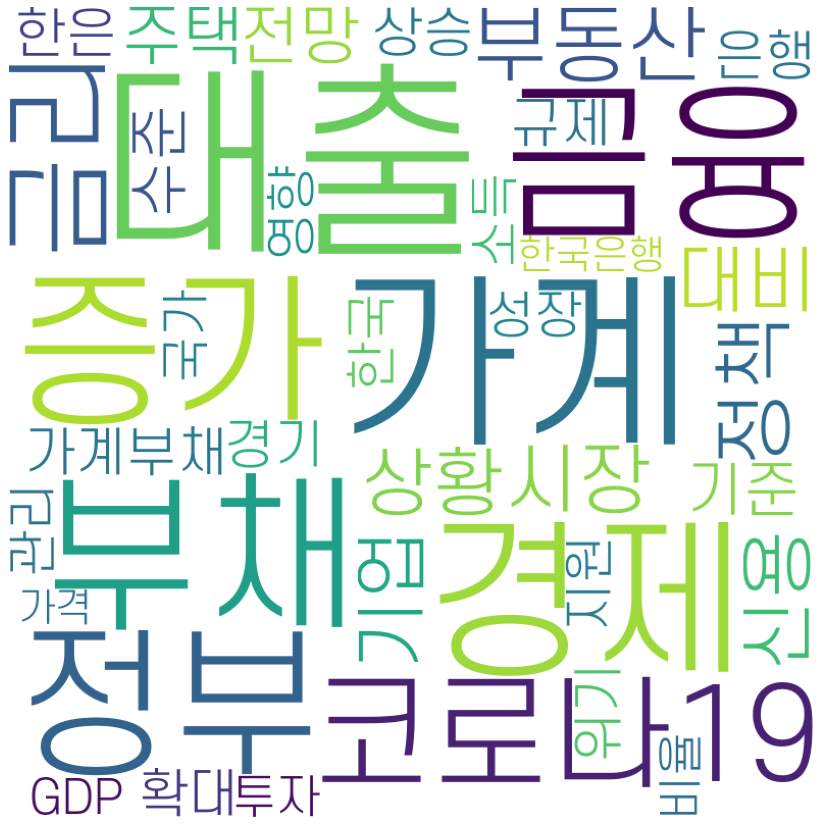

In [25]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(total_list)
counts = Counter(total_list)
tags = counts.most_common(40)

word_cloud = WordCloud(font_path='C:/Users/Becky/Desktop/글씨체/SCDream3.otf',
            width=800, height=800, max_words=150, max_font_size=200, background_color='white',random_state=123)
word_cloud.generate_from_frequencies(dict(tags))

plt.figure(figsize = (15,15))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()